In [1]:
# Importing Required Libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from scipy import stats

# US Consumption Habits

In [3]:
data = pd.read_excel('ConsumptionData.xlsx', index_col='Year')
data

,Consumption (Billion USD),Revenue (Billion USD),Population,Price Index,Trend
Year,,,,,
1929,77.4,85.3,121767000,9.391,1
1930,70.1,76.5,123076741,9.028,2
1931,60.7,65.7,124039648,8.136,3
1932,48.7,50.3,124840471,7.209,4
1933,45.9,47.2,125578763,7.014,5
...,...,...,...,...,...
2017,13233.6,16839.8,325122128,107.743,89
2018,13905.0,17683.8,326838199,110.344,90
2019,14392.7,18587.0,328329953,112.303,91


## Summary

> This dataset is about the consumption habits of Americans over time. It shows the historical consumption, revenue, population, price index and trend in the United States from 1929 to 2021.

### Columns Description

1. **`Consumption (Billion USD)`**: This column shows the amount of consumption in the United States in billions of US dollars. Consumption is the total amount of goods and services that are purchased by individuals, businesses, and governments.

2. **`Revenue (Billion USD)`**: This column shows the amount of revenue in the United States in billions of US dollars. Revenue is the total amount of money that is generated by businesses from selling goods and services.

3. **`Population`**: This column shows the population of the United States in millions of people.

4. **`Price Index - (Inflation)`**: This column shows the price index of the United States. The price index is a measure of the prices of goods and services in the economy. It is calculated by comparing the prices of a basket of goods and services in a given year to the prices of the same basket of goods and services in a base year. The price index is closely related to inflation. Inflation is the rate at which prices are rising, and the price index measures the prices of goods and services. Therefore, the price index can be used to measure inflation. For example, if the price index in 2023 is 120 and the price index in 2022 was 100, then the inflation rate in 2023 is 20%.

5. **`Trend`**: The trend column is the trend of consumption in the United States. The trend can be either positive (increasing) or negative (decreasing).

My goal is to study this dataset to understand the behavior of consumer in US. 

## Economic Fluctuations in U.S. History (1929-2021)

Here is a comprehensive list of ranges of years, along with explanations, for significant economic fluctuations in U.S. history between 1929 and 2021:

| Economic Fluctuation | Start Year | End Year | Explanation |
|---|---|---|---|
| Great Depression | 1929 | 1940 | The Great Depression began with the stock market crash in 1929 and extended through most of the 1930s. It was marked by widespread unemployment, bank failures, and a sharp contraction in economic activity. |
| Post-World War II Boom | Mid-1940s | Early 1970s | Following World War II, the U.S. experienced an extended period of economic growth, fueled by factors such as increased consumer spending, infrastructure development, and technological advancements. |
| 1970s Stagflation | Early 1970s | Late 1970s | The 1970s were marked by stagflation, a rare combination of high inflation and stagnant economic growth. Factors included oil price shocks and economic policy challenges. |
| Early 1980s Recession | 1980 | 1982 | The early 1980s recession was driven by high interest rates and a severe monetary policy response aimed at curbing inflation. It resulted in a temporary economic downturn. |
| 1990-1991 Recession | 1990 | 1991 | The 1990-1991 recession was caused by factors such as the savings and loan crisis, a slowdown in economic growth, and uncertainties surrounding the Gulf War. |
| Dot-Com Bubble and Early 2000s Recession | 2000 | 2001 | The burst of the dot-com bubble in 2000 led to an economic slowdown and a brief recession in 2001. |
| Global Financial Crisis (Great Recession) | 2007 | 2009 | The global financial crisis began with the subprime mortgage crisis in 2007 and extended into 2008 and 2009. It resulted in severe financial market disruptions and economic downturns worldwide. |
| Post-Great Recession Recovery | Late 2000s | Early 2010s | Following the Great Recession, there was a period of economic recovery and growth, characterized by stimulus measures and efforts to stabilize financial markets. |
| COVID-19 Pandemic Recession | 2019 | 2021 (with ongoing effects) | The COVID-19 pandemic led to a significant economic downturn in 2020, with widespread lockdowns, supply chain disruptions, and job losses. The economic impact continued into 2021. |

These ranges of years represent significant economic fluctuations in U.S. history between 1929 and 2021, each with its unique causes and consequences. Economic conditions during these periods varied widely, shaping the nation's economic landscape.


In [4]:
# sampling Data
data.sample(5)

,Consumption (Billion USD),Revenue (Billion USD),Population,Price Index,Trend
Year,,,,,
1980,1750.7,2323.6,227225000,42.251,52
1950,192.0,233.7,152271417,13.055,22
1982,2071.3,2791.6,231664000,49.099,54
1936,62.2,69.2,128053180,7.597,8
1983,2281.6,2981.1,233792000,51.018,55


In [5]:
# Check for null values
data.isnull().sum()

Consumption (Billion USD)    0
Revenue  (Billion USD)       0
Population                   0
Price Index                  0
Trend                        0
dtype: int64

In [6]:
# data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 1929 to 2021
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Consumption (Billion USD)  93 non-null     float64
 1   Revenue  (Billion USD)     93 non-null     float64
 2   Population                 93 non-null     int64  
 3   Price Index                93 non-null     float64
 4   Trend                      93 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 4.4 KB


In [7]:
# summary stats
data.describe().round()

,Consumption (Billion USD),Revenue (Billion USD),Population,Price Index,Trend
count,93.0,93.0,93.0,93.0,93.0
mean,3559.0,4536.0,218552668.0,45.0,47.0
std,4472.0,5718.0,66336212.0,36.0,27.0
min,46.0,47.0,121767000.0,7.0,1.0
25%,219.0,282.0,157552740.0,14.0,24.0
50%,1030.0,1369.0,215973000.0,30.0,47.0
75%,5877.0,7607.0,275854000.0,75.0,70.0
max,15903.0,21295.0,331893745.0,119.0,93.0


### What is the overall shape of the distribution for each variable? Are any of the distributions skewed?

Consumption (Billion USD) 1.1945857969099394
Revenue  (Billion USD) 1.2606016144382397
Population 0.130677639647687
Price Index 0.5579298566988515


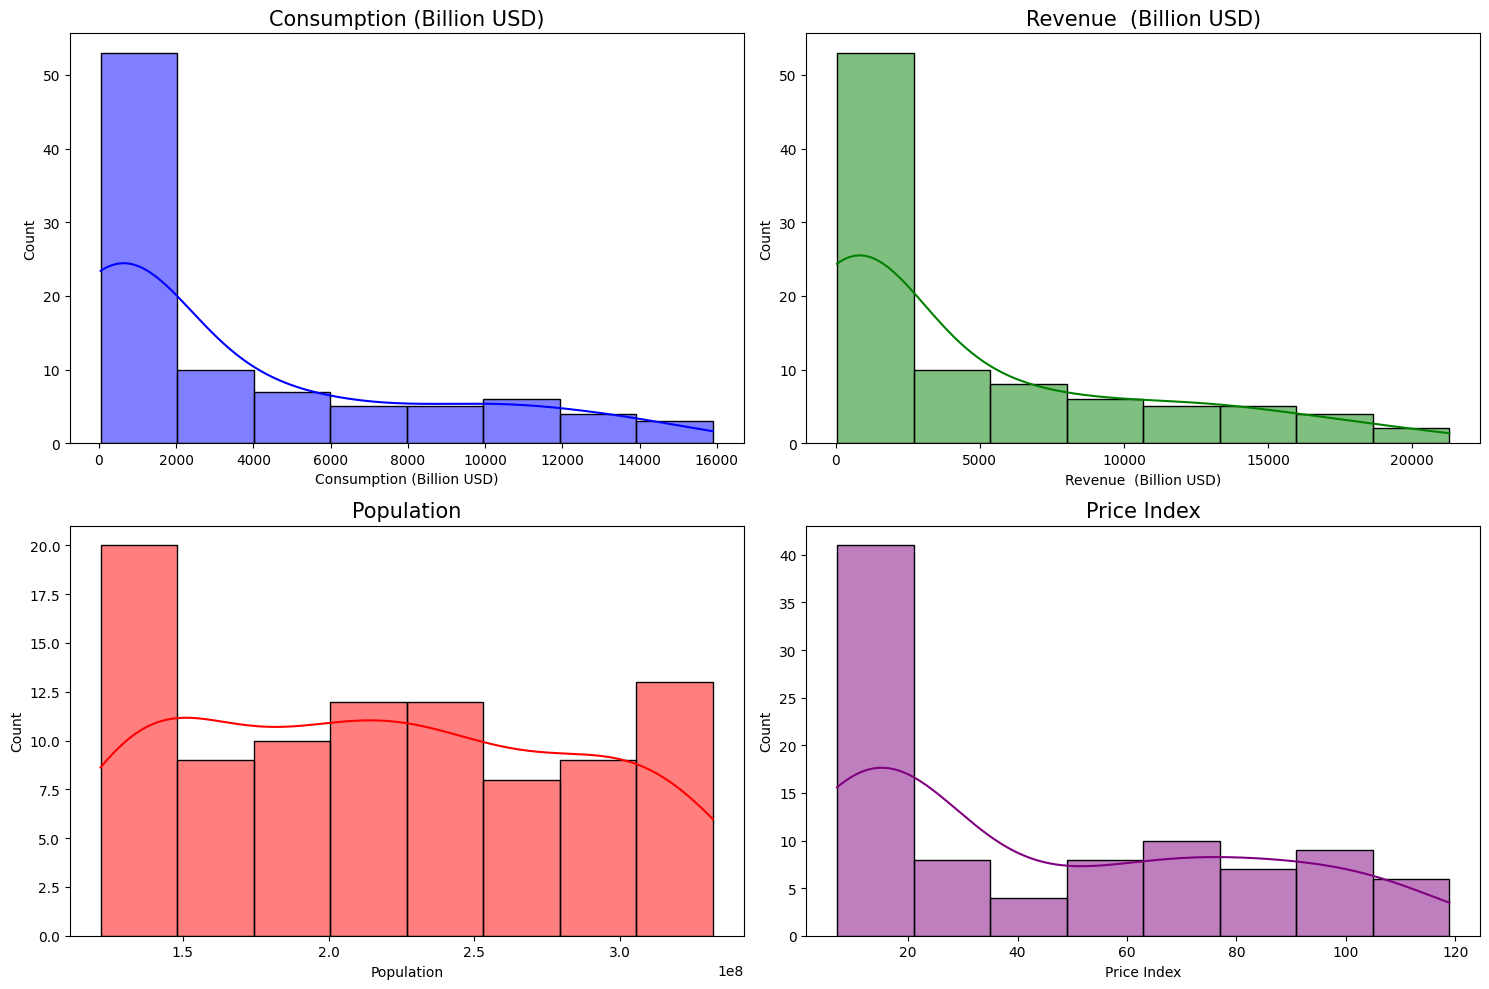

In [8]:
# Plotting distribution of all the variables
cols = data.iloc[:,[0,1,2,3]].columns.to_list()
plt.figure(figsize=(15, 10))
colors = ['blue', 'green', 'red', 'purple']
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=data,x = cols[i], color=colors[i], kde=True)
    plt.title(cols[i], size=15)
    print(cols[i], data[cols[i]].skew())
plt.tight_layout()    
plt.show()    

## Conclusion
- Distribution of **Consumption and Revenue** both are moderately positively skewed. This means that the tail on the right side is longer or fatter than the left side. According to data most of the year's consumption value is lower, i.e, betweem 40 to 4000, and Revenue is between 40 to 5000. The median is less than the mean.
- The distribution of Population is slightly skewed to the right but is close to a normal distribution. This means that the distribution is almost symmetrical, with an equal number of observations above and below the median. It also shows the growth of population over the years are steady.
- Distribution of Price Index also shows positive skewed, means that there are some years with higher inflation. Some years with lower inflation also.

### Are there any outliers or anomalies in the data? If Yes, Identify them.

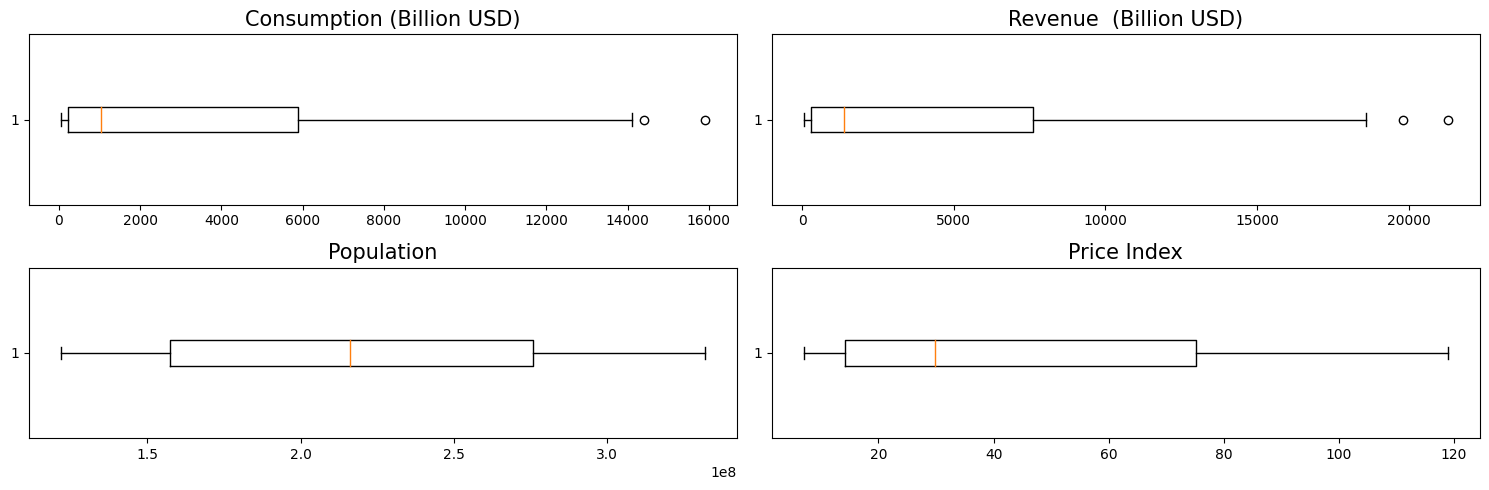

In [9]:
plt.figure(figsize=(15, 5))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.boxplot(data = data, x = cols[i], vert = False)
    plt.title(cols[i], size=15)
plt.tight_layout()    
plt.show()    

# Conclusion
- Consumption and Revenue has some Outliers and the values are mentioned below.

In [10]:
def detect_outliers(data):
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    IQR = Q3 - Q1
    min_ = Q1 - 1.5 * IQR
    max_ = Q3 + 1.5 * IQR
    return data[(data < min_) | (data > max_)]
print("Outliers in Consumption: ",detect_outliers(data['Consumption (Billion USD)']).values)
print("Outliers in Revenue: ",detect_outliers(data['Revenue  (Billion USD)']).values)

Outliers in Consumption:  [14392.7 15902.6]
Outliers in Revenue:  [19832.3 21294.8]


### Thoughts
> I will kep this data because is the part of the US Consumption habits.

In [11]:
data.columns

Index(['Consumption (Billion USD)', 'Revenue  (Billion USD)', 'Population',
       'Price Index', 'Trend'],
      dtype='object')

### Provide an analysis of the yearly percentage change in the key variables over the past few years?

In [12]:
# Creating a function to calculate yearly percent change.
# Yearly percentage change = (Current value - Previous value) / Previous value * 100

def get_percent_change(data):
    shifted = data.shift(periods=1)
    change = ((data - shifted)*100)/shifted
    return change   

In [13]:
data['Consumption (Billion USD)_Change'] = get_percent_change(data['Consumption (Billion USD)'])
data['Revenue (Billion USD)_Change'] = get_percent_change(data['Revenue  (Billion USD)'])
data['Population_Change'] = get_percent_change(data['Population'])
data['Price Index_Change'] = get_percent_change(data['Price Index'])

In [14]:
data

,Consumption (Billion USD),Revenue (Billion USD),Population,Price Index,Trend,Consumption (Billion USD)_Change,Revenue (Billion USD)_Change,Population_Change,Price Index_Change
Year,,,,,,,,,
1929,77.4,85.3,121767000,9.391,1,NaN,NaN,NaN,NaN
1930,70.1,76.5,123076741,9.028,2,-9.431525,-10.316530,1.075612,-3.865403
1931,60.7,65.7,124039648,8.136,3,-13.409415,-14.117647,0.782363,-9.880372
1932,48.7,50.3,124840471,7.209,4,-19.769357,-23.439878,0.645619,-11.393805
1933,45.9,47.2,125578763,7.014,5,-5.749487,-6.163022,0.591388,-2.704952
...,...,...,...,...,...,...,...,...,...
2017,13233.6,16839.8,325122128,107.743,89,4.256576,4.615174,0.634649,1.929936
2018,13905.0,17683.8,326838199,110.344,90,5.073449,5.011936,0.527824,2.414078
2019,14392.7,18587.0,328329953,112.303,91,3.507371,5.107500,0.456420,1.775357


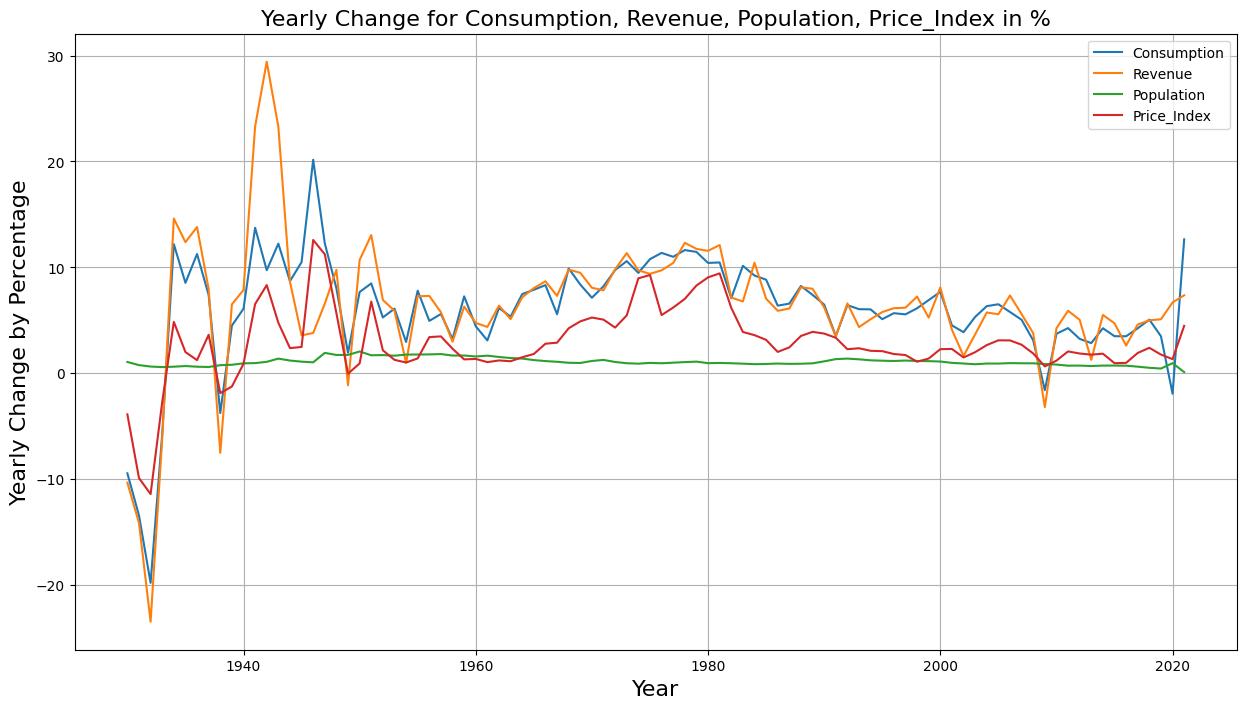

In [15]:
plt.figure(figsize=(15,8))
plt.plot(data['Consumption (Billion USD)_Change'], label= 'Consumption')
plt.plot(data['Revenue (Billion USD)_Change'], label= "Revenue")
plt.plot(data['Population_Change'], label= 'Population')
plt.plot(data['Price Index_Change'], label= 'Price_Index')
plt.xlabel('Year', size=16)
plt.ylabel('Yearly Change by Percentage', size= 16)
plt.title('Yearly Change for Consumption, Revenue, Population, Price_Index in %', size= 16)
plt.legend()
plt.grid()
plt.show()

## Conclusion

- There are many big fluctuation of Consumption, Revenue and Inflation between Year 1930 to 1950, because of **Great Depression and World War II**. After 1960 no higer fluctuations (peaks or troughs), it was steadly increasing. Late 2000,there is a trough because of **Dot-Com Bubble and Early 2000s Recession**. In year 2019-2020, we can observe trough in Consumption because of **Covid-19** but not in Revenue, because of many **Online Businesses**.
- After 2020, there is a peak in Consumption because of less reports in Covid and there were little curfew.
- Price-Index (Inflations) is noticable between year 1970 to 1980.
- The Population of US has been consistent over the years. Means, There is no increment or decrement in population across years.

## Calculate the percentage of consumption with respect to revenue

In [16]:
(77.4/85.3)*100

90.7385697538101

In [17]:
# Calculating percentage of consumption.
data['consumption_revenue_pct'] = ((data['Consumption (Billion USD)'] / data['Revenue  (Billion USD)'])) * 100

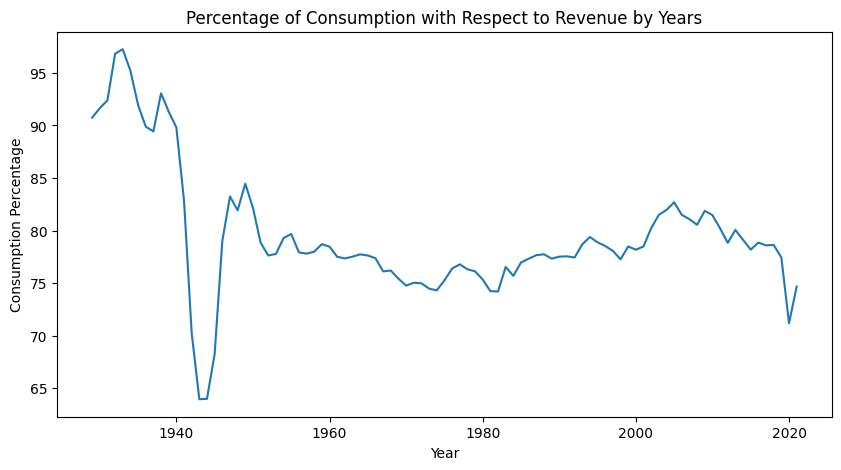

In [18]:
plt.figure(figsize=(10,5))
plt.plot(data['consumption_revenue_pct'])
plt.xlabel('Year')
plt.ylabel('Consumption Percentage')
plt.title("Percentage of Consumption with Respect to Revenue by Years")
plt.show()

In [19]:
data['consumption_revenue_pct'].describe()

count    93.000000
mean     79.471800
std       6.063116
min      63.956466
25%      76.783992
50%      78.180201
75%      81.077079
max      97.245763
Name: consumption_revenue_pct, dtype: float64

## Conclusion
- There is an increase in percentage of Consumption w.r.t Revenue around Year 1930, with max value of 97.24%.
- There is a trough in late year 1940, with min value of 63.95%.
- The data suggests a gradual increase from the early 1980s onwards, which may be correlated with economic improvement.
- Around Year 1920, there is a trough is consumption (% of consumptio decreased w.r.t to Revenue) due to Covid-19.

In [20]:
data[data['consumption_revenue_pct']> 95]
# Revenue is 50 and consumption is 48. Means, 96% of Revenue is consumed.

,Consumption (Billion USD),Revenue (Billion USD),Population,Price Index,Trend,Consumption (Billion USD)_Change,Revenue (Billion USD)_Change,Population_Change,Price Index_Change,consumption_revenue_pct
Year,,,,,,,,,,
1932,48.7,50.3,124840471,7.209,4,-19.769357,-23.439878,0.645619,-11.393805,96.819085
1933,45.9,47.2,125578763,7.014,5,-5.749487,-6.163022,0.591388,-2.704952,97.245763
1934,51.5,54.1,126373773,7.355,6,12.200436,14.618644,0.633077,4.861705,95.194085


In [21]:
data[data['consumption_revenue_pct']< 65]

,Consumption (Billion USD),Revenue (Billion USD),Population,Price Index,Trend,Consumption (Billion USD)_Change,Revenue (Billion USD)_Change,Population_Change,Price Index_Change,consumption_revenue_pct
Year,,,,,,,,,,
1943,99.9,156.2,136739353,9.314,15,12.247191,23.283346,1.393895,4.781190,63.956466
1944,108.6,169.7,138397345,9.536,16,8.708709,8.642766,1.212520,2.383509,63.995286


## What is the extent of the association between the variables, and what is the nature of this association?

In [22]:
## Correlation

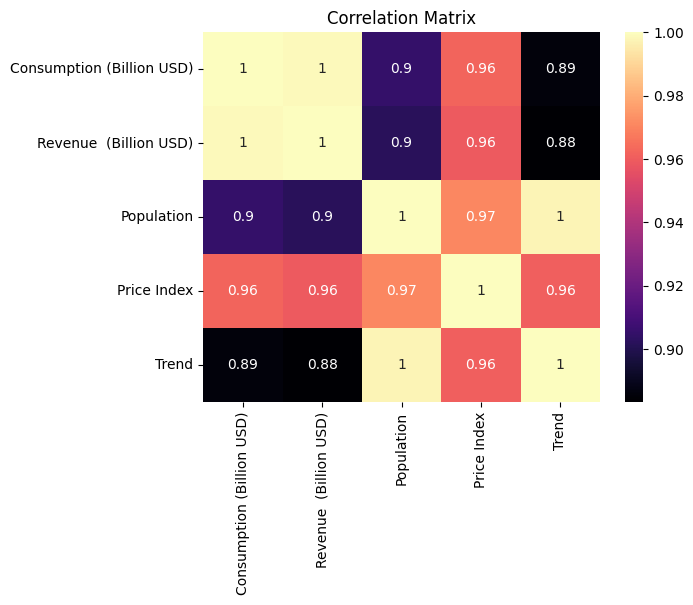

In [23]:
sns.heatmap(data.iloc[:,0:5].corr(), annot=True, cmap='magma')
plt.title("Correlation Matrix")
plt.show()

## Conclusion
- Almost all the variables are correlated to each other. Consumption and Revenue has a very strong positive correlation with value 1. Means, As the Revenue increases Consumption also increases.
- Consumption and Revenue have also a strong positive correlation with Population with value 0.9. It shows, as Population Increases, Revenue increases and Consumption also increases. There may also be other factor of increasing Revenue and Consumption apart from Population.


## Have there been any notable changes in the trends of the variables over the years?

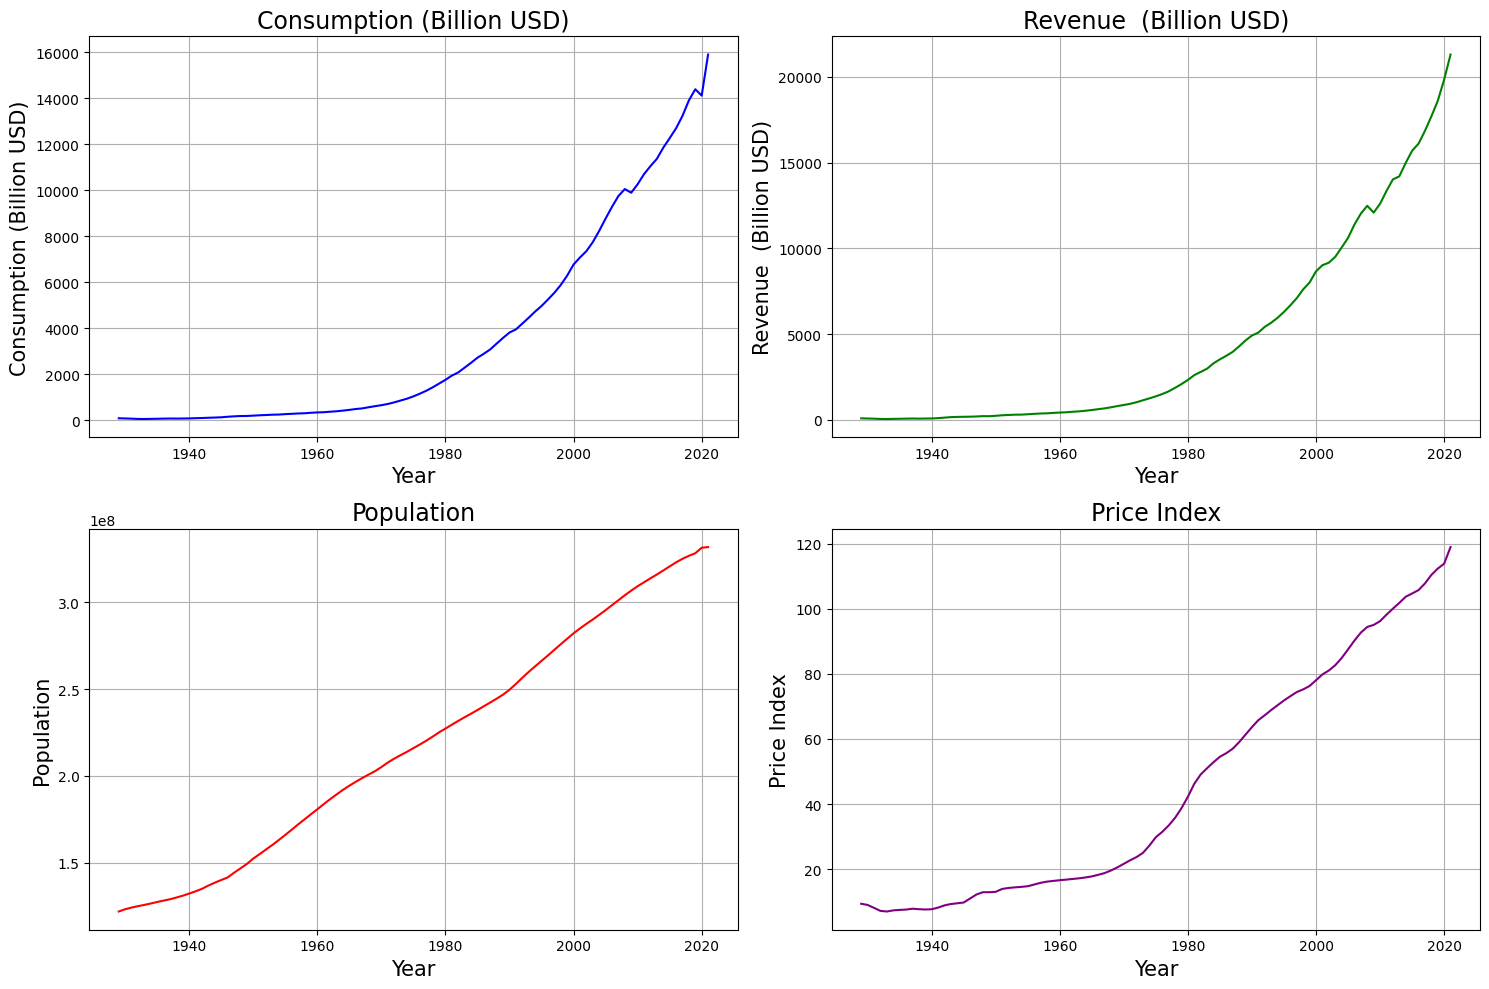

In [24]:
# Plotting distribution of all the variables

cols = data.iloc[:,[0,1,2,3]].columns.to_list()
plt.figure(figsize=(15, 10))
colors = ['blue', 'green', 'red', 'purple']
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.lineplot(data[cols[i]],  color=colors[i])
    plt.xlabel("Year", size = 15)
    plt.ylabel(cols[i], size=15)
    #sns.histplot(data=data,x = cols[i], color=colors[i], kde=True)
    plt.title(cols[i], size=17)
    plt.grid()
plt.tight_layout()    
plt.show()    

## Conclusion
- Growth of **Consumption** was slow till 1970, From further here Consumption has consistently increased over the years. Two rounds of slightly decline have been observed, around year **2010 (Great Recession) and year 2020 (Covid-19)**
- Growth of **Revenue** was also slow till 1970, From further here Revenue has consistently increased over the years. A slightly decline has been observed around year **2010 (Great Recession)**. There has been no any decline around year **2020 (Covid-19)** because of the online businesses.
- The population is continuously increasing with time, but with low range as compared to other.
- Price Index (Inflation) has been consistently increased over the years. After Year 1970 Rate of Inflation has jumped, it means that the prices of goods and services are rising than they were before.

## How have variables behaved during the Great Depression in US - 1929-1933?

In [25]:
cols

['Consumption (Billion USD)',
 'Revenue  (Billion USD)',
 'Population',
 'Price Index']

In [26]:
depression_year = data.query("index >= 1929" and "index <= 1935").iloc[:,0:4]
depression_year

,Consumption (Billion USD),Revenue (Billion USD),Population,Price Index
Year,,,,
1929,77.4,85.3,121767000,9.391
1930,70.1,76.5,123076741,9.028
1931,60.7,65.7,124039648,8.136
1932,48.7,50.3,124840471,7.209
1933,45.9,47.2,125578763,7.014
1934,51.5,54.1,126373773,7.355
1935,55.9,60.8,127250232,7.503


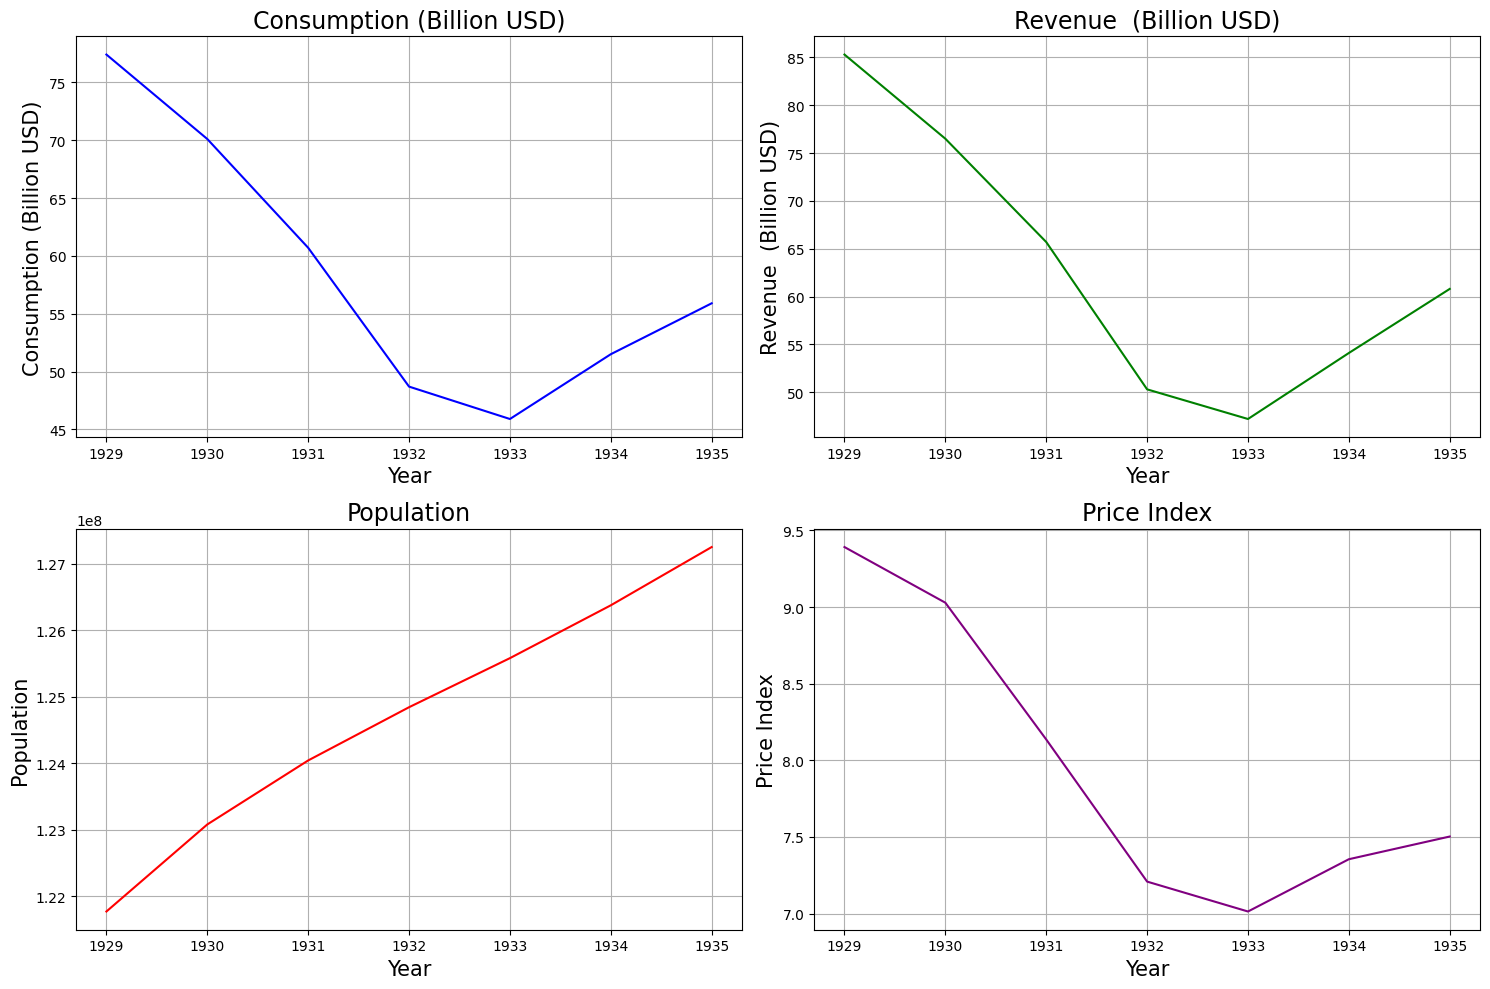

In [27]:
# Plotting distribution of all the variables
plt.figure(figsize=(15, 10))
colors = ['blue', 'green', 'red', 'purple']
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.lineplot(depression_year[cols[i]],  color=colors[i])
    plt.xlabel("Year", size = 15)
    plt.ylabel(cols[i], size=15)
    #sns.histplot(data=data,x = cols[i], color=colors[i], kde=True)
    plt.title(cols[i], size=17)
    plt.grid()
plt.tight_layout()    
plt.show() 

## Conclusion
- In the year 1929, Consumption and Revenue fell sharply to low levels by 1932. It is clear that due to the great recession people's income decreased and hence consumption decreased. Because Great Depression ended in 1933, So Consumption and Revenue started incrasing.
- Price Index also showed a rapid drop to low by 1932 with low range. A rapid drop in inflation can be a sign of a weakening economy. It can discourage spending and investment.
- Population has consistently increased during this Great Recession period.

## Plot scatter plots for Consumption against Year, Revenue, Population, and Price Index

In [28]:
data.columns

Index(['Consumption (Billion USD)', 'Revenue  (Billion USD)', 'Population',
       'Price Index', 'Trend', 'Consumption (Billion USD)_Change',
       'Revenue (Billion USD)_Change', 'Population_Change',
       'Price Index_Change', 'consumption_revenue_pct'],
      dtype='object')

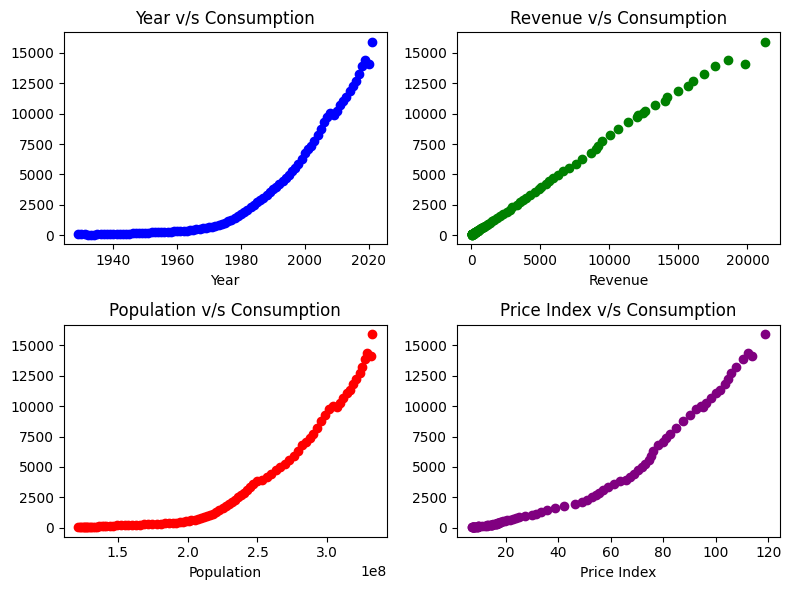

In [29]:
# Create a 2x2 grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Scatter plot for ax1 (Year vs. Consumption) with color 'blue'
ax1.scatter(data.index, data['Consumption (Billion USD)'], color='blue')
ax1.set_xlabel('Year')
ax1.set_title('Year v/s Consumption')

# Scatter plot for ax2 (Revenue vs. Consumption) with color 'green'
ax2.scatter(data['Revenue  (Billion USD)'], data['Consumption (Billion USD)'], color='green')
ax2.set_xlabel('Revenue')
ax2.set_title('Revenue v/s Consumption')

# Scatter plot for ax3 (Population vs. Consumption) with color 'red'
ax3.scatter(data['Population'], data['Consumption (Billion USD)'], color='red')
ax3.set_xlabel('Population')
ax3.set_title('Population v/s Consumption')

# Scatter plot for ax4 (Price Index vs. Consumption) with color 'purple'
ax4.scatter(data['Price Index'], data['Consumption (Billion USD)'], color='purple')
ax4.set_xlabel('Price Index')
ax4.set_title('Price Index v/s Consumption')

plt.tight_layout()
plt.show()

### All the features are having linear relationship or sort of linear relationship with consumption. We can apply linear regression model to predict the consumption.

In [30]:
df = data.iloc[:,:5]
df

,Consumption (Billion USD),Revenue (Billion USD),Population,Price Index,Trend
Year,,,,,
1929,77.4,85.3,121767000,9.391,1
1930,70.1,76.5,123076741,9.028,2
1931,60.7,65.7,124039648,8.136,3
1932,48.7,50.3,124840471,7.209,4
1933,45.9,47.2,125578763,7.014,5
...,...,...,...,...,...
2017,13233.6,16839.8,325122128,107.743,89
2018,13905.0,17683.8,326838199,110.344,90
2019,14392.7,18587.0,328329953,112.303,91


In [31]:
X = df[['Revenue  (Billion USD)', 'Population', 'Price Index', 'Trend']]
Y = df['Consumption (Billion USD)']

In [32]:
# Applying standardscaler to independent variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [34]:
# Creating a linear Regression model
reg  = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicting values
y_pred = reg.predict(X_test)
y_pred

array([  606.54493561,    70.1610303 ,  2683.42572706,  7199.84886152,
         364.66970955,   149.40731075,   556.69366938,  5406.00713226,
         -17.90293277,   888.37648982, 11003.24201011,   410.87783287,
       14300.83017497,  4103.13140931,   -47.95306593,   170.21495622,
         -20.25246389,   218.61888861,  1496.30899347,  4827.74411816,
         -34.86412295,  5730.1963134 ,  9505.7530447 ,   270.96450002,
         354.14578949,   -40.62515998,  5103.36512492,  6117.23601631])

In [36]:
# Coefficients
reg.coef_

array([ 3981.83554462,  1486.40840861,   462.08854409, -1494.69533033])

In [37]:
# intercept
reg.intercept_

3563.473831110615

In [38]:
difference = y_pred - y_test

In [39]:
# calculating r2_score
score = r2_score(y_test, y_pred)
score

0.9986902261597902

In [40]:
# Adjusted r2_score
Adjusted_R_squared = 1 - (1 - score) * ((93 - 1)/(93 - 4 - 1))
Adjusted_R_squared
# So, all of the independent features are relevant.

0.9986306909852352

In [41]:
# Calculate the mean squared error
mse = np.mean((y_pred - y_test)**2)
# Calculate the mean absolute error
mae = np.mean(np.abs(y_pred - y_test))
print(mse)
print(mae)

18981.57072371624
115.89031955984585


In [42]:
# Analysing values difference between y_test and y_pred
diff = pd.DataFrame({
    "Y_test":y_test,
    'Y_pred':y_pred,
    "Difference": y_pred - y_test
})
diff

,Y_test,Y_pred,Difference
Year,,,
1969,603.6,606.544936,2.944936
1951,208.3,70.161030,-138.138970
1984,2492.3,2683.425727,191.125727
2001,7073.8,7199.848862,126.048862
1929,77.4,364.669710,287.269710
1955,258.3,149.407311,-108.892689
1968,556.9,556.693669,-0.206331
1996,5244.6,5406.007132,161.407132
1939,67.2,-17.902933,-85.102933


> Some of the predictions are close but some have a huge difference. So, having r2_score is 0.99 but still I cannot rely on this model, because R-squared score only measures how well the model fits the training data.
- Next, Lets check that our data follows assumptions of linear regression or not.

### Assumption of Linear Regression

1. Linearity
2. Normality of Residuals
3. Homoscedasticity
4. No Autocorrelation
5. No or little multicollinearity

#### 1. Linearity
> In linearity assumption, there is a linear relationship between independent and dependent variable. Can create a scatterplot or residulal plot to check linearity assumption.

In [43]:
# Scatterplot

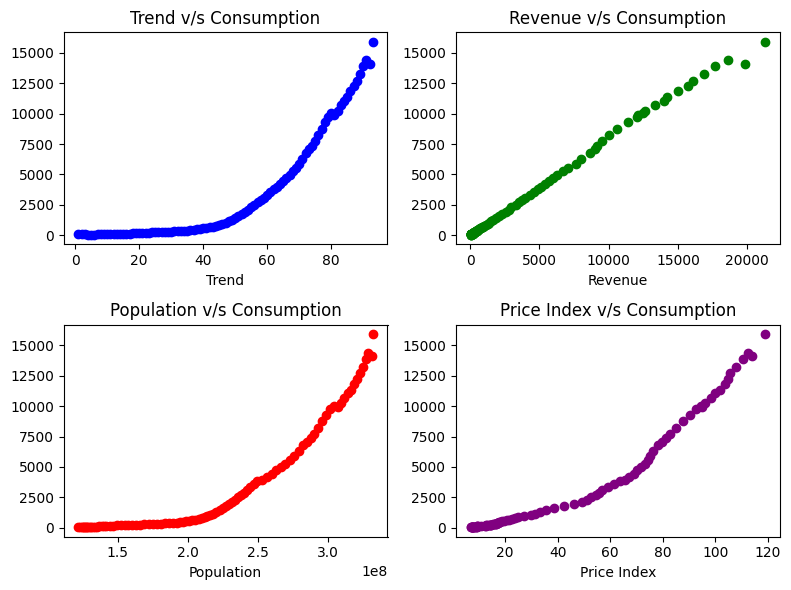

In [44]:
# Create a 2x2 grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Scatter plot for ax1 (Trend vs. Consumption) with color 'blue'
ax1.scatter(data['Trend'], data['Consumption (Billion USD)'], color='blue')
ax1.set_xlabel('Trend')
ax1.set_title('Trend v/s Consumption')

# Scatter plot for ax2 (Revenue vs. Consumption) with color 'green'
ax2.scatter(data['Revenue  (Billion USD)'], data['Consumption (Billion USD)'], color='green')
ax2.set_xlabel('Revenue')
ax2.set_title('Revenue v/s Consumption')

# Scatter plot for ax3 (Population vs. Consumption) with color 'red'
ax3.scatter(data['Population'], data['Consumption (Billion USD)'], color='red')
ax3.set_xlabel('Population')
ax3.set_title('Population v/s Consumption')

# Scatter plot for ax4 (Price Index vs. Consumption) with color 'purple'
ax4.scatter(data['Price Index'], data['Consumption (Billion USD)'], color='purple')
ax4.set_xlabel('Price Index')
ax4.set_title('Price Index v/s Consumption')

plt.tight_layout()
plt.show()

- Scatterplots shows that data is linear or sort of linear with Consumption. Lets create residual plot

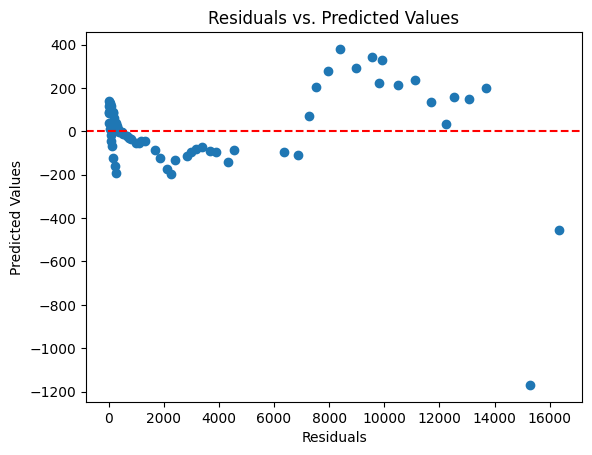

In [45]:
# Residual Plots
model = LinearRegression()
model.fit(X_scaled,Y)
y_pred2 = model.predict(X_train)
residuals  = y_train - y_pred2

plt.scatter(y_pred2, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.show()

- The residual plot shows a random scatter of points around the zero line (not exactly). This means that the linearity assumption of linear regression is partially met. There is no obvious pattern in the residual plot, such as a funnel shape or a curved line.  it suggests that the linear regression model is a fit for the data.

#### 2. Normality of Residuals
> The error terms(residuals) are assumed to follow a normal distribution with a mean of zero and constant variance. To check this assumption plot Historgam of residuals, QQ plot and Hypothesis Testing (Omnibus Test).

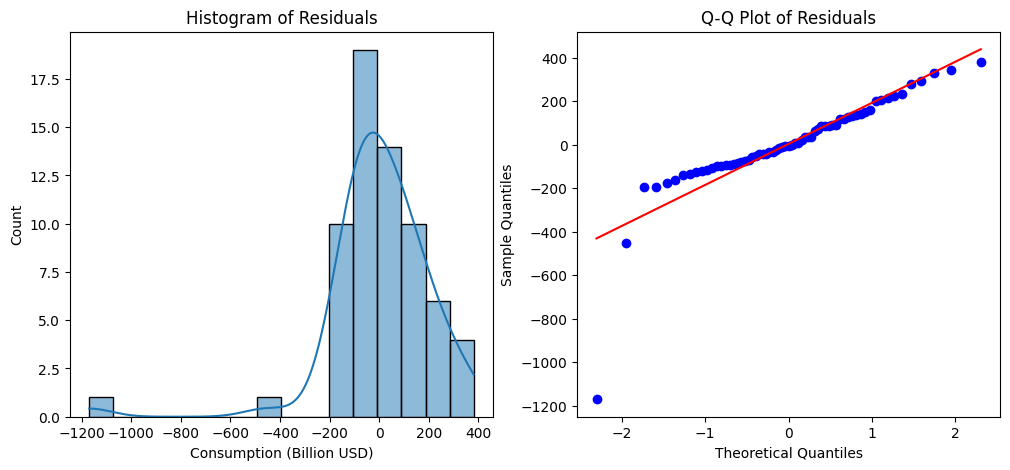

Mean of residuals: 4.2718


In [46]:
# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

#Q-Q Plot
plt.subplot(122)
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#mean of residuals
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")

The Histogram of residuals indicate that the training data is not exactly normaly distributed, and in QQ plot, all the points do not lie on the line. They are random. So, according to me, the 2nd assumption **Normality of Residuals** failed. To cross check, lets apply **Omnibus Test**.

> **Omnibus Test - Hypothesis Testing**
- Null Hypothesis = residuals are normally distributed.
- Alternate Hypothesis = Residuals are not Normally distributed.
> Significance level is 0.05

In [47]:
# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Omnibus test statistic: {omnibus_stat:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value}")

Skewness: -2.5541
Kurtosis: 13.2331
Omnibus test statistic: 62.4774
Omnibus test p-value: 2.7114476202832925e-14


> The p-value of the Omnibus test is less than 0.05, means I reject the null hypothesis.
So, the residuals are not normally distributed.

#### 3. Homoscedasticity
> The Spread of the error terms(residuals) should be constant across all levels of the independent variable.

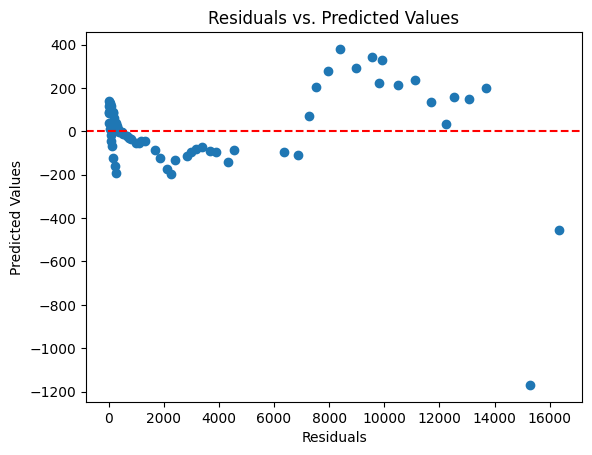

In [48]:
plt.scatter(y_pred2, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.show()

> No, the graph does not show a random scattering of points around 0. The residuals appear to be increasing in magnitude as the predicted values increase, which is indicative of heteroscedasticity. To check this, lets apply **Breusch - Pegan test.**


> **Breusch-Pegan - Hypothesis Testing**
- Null Hypothesis = Error Variances are constant - Homoscedastic
- Alternate Hypothesis = Error Variances are not constant - Heteroscedastic
> Significance level is 0.05

In [49]:
X = sm.add_constant(X_train)
# Run the OLS model
model = sm.OLS(y_train, X).fit()
# Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, X)
print("Homoscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test[0]}\nLM-Test p-value: {bp_test[1]}\nF-Statistic: {bp_test[2]}\nF-Test p-value: {bp_test[3]}\n")

Homoscedastic dataset - Breusch-Pagan test results:
LM Statistic: 15.919577746233479
LM-Test p-value: 0.003128998762855136
F-Statistic: 4.865354763225917
F-Test p-value: 0.0018255944527477302



> The p-value of the breuschpagan is less than 0.05, means I reject the null hypothesis.
So, error variances are not constant. It leads to heteroscadasticity.

#### 4. No Autocorrelation
> There should be no apparent correlation or pattern in the residuals, as this
would suggest that the error terms are not independent. The no autocorrelation assumption in linear regression states that the error terms in the model are not correlated with each other. This means that the value of one error term does not depend on the value of any other error term.

In [50]:
from statsmodels.stats.stattools import durbin_watson
dw_test = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {round(dw_test,2)}")

Durbin-Watson statistic: 2.05


> A **Durbin-Watson statistic of 2.05** indicates that there is no evidence of autocorrelation in the data. This is because the statistic is close to 2, which is the value that indicates no autocorrelation.

#### 5. No or Little Multicollinearity

In [70]:
# Import the variance inflation factor function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a list to store the VIF values
vif = []

# Iterate over the columns in the data frame
for i in range(len(col_data.columns)):
    # Calculate the VIF for the current column
    current_vif = variance_inflation_factor(col_data, i)

    # Add the current VIF to the list of VIF values
    vif.append(current_vif)

# Print the VIF values
print(vif)

[26.271479642801264, 29.524154244325405, 119.31183062348953, 99.75518658200806]


In [71]:
pd.DataFrame({'vif': vif}, index=col_data.columns[0:4]).T

,Revenue (Billion USD),Population,Price Index,Trend
vif,26.27148,29.524154,119.311831,99.755187


> Here all the variable's **VIF(Variance Inflance Factor) is greater than 5**, it indicates that there is a strong multicollinearity
between independent variables.

## Conclusion
> So, to predict consumption, I applied Linear Regression model but the value of residuals are very high. To verify our model is perfect or not, I applied assumption of linear regression where 3 assumption failed **(Normality of Residuals, Homoscedasticity, Multicollinearity).**, Now I can say this model is not perfect for prediction.

### Implement Ploynomial Regression

In [86]:
from sklearn.preprocessing import PolynomialFeatures
# Fit a polynomial model
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

In [88]:
# Import the PolynomialFeatures class
from sklearn.preprocessing import PolynomialFeatures

# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the training and test data using the PolynomialFeatures object
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a LinearRegression object
poly_model = LinearRegression()

# Fit the polynomial model to the training data
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test data using the polynomial model
poly_y_pred = poly_model.predict(X_test_poly)

# Calculate the R-squared and mean squared error, mean_absolute_error for the polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_mae = np.mean(np.abs(poly_y_pred - y_test))

# Print the R-squared and mean squared error and mean_absolute_error
print("Polynomial regression R-squared:", poly_r2)
print("Polynomial regression mean squared error:", poly_mse)
print("Polynomial regression mean absolute error:", poly_mae)

Polynomial regression R-squared: 0.9994900887200671
Polynomial regression mean squared error: 7389.762053361545
Polynomial regression mean absolute error: 57.768487036347736


In [89]:
poly_y_pred 

array([  543.60764025,   223.99531633,  2446.94670317,  7226.24845798,
          54.27854074,   215.69520282,   507.83976887,  5369.92096496,
          35.66756921,   818.61105438, 11217.46007983,   437.58198704,
       14374.90385773,  3969.87593525,    51.17318871,    36.33737427,
         208.61604527,   280.55957231,  1435.28061889,  4711.86598241,
          98.25046172,  5726.62705866,  9672.606509  ,   323.89567058,
         396.19601155,    28.63759656,  5020.77629282,  6147.82422   ])

In [90]:
pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred,
    'poly_y_pred':poly_y_pred 
})

,y_test,y_pred,poly_y_pred
Year,,,
1969,603.6,606.544936,543.607640
1951,208.3,70.161030,223.995316
1984,2492.3,2683.425727,2446.946703
2001,7073.8,7199.848862,7226.248458
1929,77.4,364.669710,54.278541
1955,258.3,149.407311,215.695203
1968,556.9,556.693669,507.839769
1996,5244.6,5406.007132,5369.920965
1939,67.2,-17.902933,35.667569


## Conclusion
> If I compare Linear and Ploynomial Regression both, then Polynomial Regression is working well. So, to predict Consumption, polynomial Regression is perfect model.
> I know, there are too many factors that influence Consumption except the variables I have.

# Thank You